# EDA : Lok Sabha Winners, 2009 

## Extracting data

In [25]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate",  "Constituency", "Party", "Criminal Cases", "Education", "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    try:
        url = "https://myneta.info/ls2009/index.php?action=show_winners&sort=default"
        html = urlopen(url)
        soup = BeautifulSoup(html,'html.parser')
        title = soup.title.text
        title = title.split()
        title = title[4:-3]
        title = " ".join(title)
        title = title.title()
        title = title.split(":")
        constituency = "+".join(title)
        title = ",".join(title)
        table = soup.find('table',attrs={'style':'padding: 0px;'})
        rows = table.find_all('tr')
        for i in range(2, len(rows)):
            col_data = []
            cols = rows[i].find_all('td')
            for i in range(1, 6):
                col_data.append(cols[i].text)
            for i in range(6, 8):
                col_data.append(inr_to_int(cols[i].text)) 
            data.append(col_data)
            print("Saving", col_data[1], "=>", col_data[0], "("+col_data[2]+")")
            constituencies += 1
    except:
        print('ERROR')
    else:
        print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', constituencies, 'constituencies')
    df.to_csv('2009.csv', index=False)
    

main()

Saving Adilabad => Ramesh Rathod (TDP)
Saving Agra => DR. RAMSHANKAR (BJP)
Saving Ahmedabad East => HARIN PATHAK (BJP)
Saving Ahmedabad West => KIRITBHAI PREMJIBHAI SOLANKI (BJP)
Saving Ahmednagar => GANDHI DILIPKUMAR MANSUKHLAL (BJP)
Saving Ajmer => SACHIN PILOT (INC)
Saving Akbarpur => RAJARAM PAL (INC)
Saving Akola => DHOTRE SANJAY SHAMRAO (BJP)
Saving Alappuzha => K C Venugopal (INC)
Saving Alathur => P K Biju (CPM)
Saving Aligarh => RAJ KUMARI CHAUHAN (BSP)
Saving Alipurduars => Manohar Tirkey (RSP)
Saving Allahabad => KUNWAR REWATI RAMAN SINGH ALIAS MANI JI (SP)
Saving Almora => PRADEEP TAMTA (INC)
Saving Alwar => JITENDRA SINGH (INC)
Saving Amalapuram => G V Harsha Kumar (INC)
Saving Ambala => SELJA (INC)
Saving Ambedkar Nagar => RAKESH PANDEY (BSP)
Saving Amethi => RAHUL GANDHI (INC)
Saving Amravati => ADSUL ANANDRAO VITHOBA (SHS)
Saving Amreli => NARANBHAI BHIKHABHAI KACHHADIYA (BJP)
Saving Amritsar => NAVJOT SINGH SIDHU (BJP)
Saving Amroha => DEVENDRA NAGPAL (RLD)
Saving Anak

Saving Pali => BADRI RAM (INC)
Saving Panchmahal => PRABHATSINH PRATAPSINH CHAUHAN (BJP)
Saving Parbhani => ADV. DUDHGAONKAR GANESHRAO NAGORAO (SHS)
Saving Paschim Champaran => DR. SANJAY JAISWAL (BJP)
Saving Pataliputra => RANJAN  PRASAD YADAV (JD(U))
Saving Patan => JAGDISHBHAI MOTIJI THAKORE (INC)
Saving Pathanamthitta => Anto Antony (INC)
Saving Patiala => PRENEET KAUR (INC)
Saving Patna Sahib => SHATRUGHAN SINHA (BJP)
Saving Peddapalle => Dr. G. Vivekanand (INC)
Saving Perambalur => NAPOLEON,D. (DMK)
Saving Phulpur => KAPIL MUNI KARWARIYA (BSP)
Saving Pilibhit => FEROZE VARUN GANDHI (BJP)
Saving Pollachi => SUGUMAR.K (ADMK)
Saving Pondicherry => NARAYANASAMY (INC)
Saving Ponnani => E T Mohamed Basheer (MUL)
Saving Porbandar => VITTHALBHAI HANSRAJBHAI RADADIYA (INC)
Saving Pratapgarh => RAJKUMARI RATNA SINGH (INC)
Saving Pune => KALMADI SURESH (INC)
Saving Puri => Pinaki Misra (BJD)
Saving Purnia => UDAY SINGH ALIAS PAPPU SINGH (BJP)
Saving Purulia => Narahari Mahato (AIFB)
Saving 

## Visualizing data

In [26]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [27]:
data = pd.read_csv('2009.csv')
data

Candidate     Constituency Party  Criminal Cases  \
0                   Ramesh Rathod         Adilabad   TDP               2   
1                  DR. RAMSHANKAR             Agra   BJP               0   
2                    HARIN PATHAK   Ahmedabad East   BJP               2   
3    KIRITBHAI PREMJIBHAI SOLANKI   Ahmedabad West   BJP               0   
4    GANDHI DILIPKUMAR MANSUKHLAL       Ahmednagar   BJP               9   
..                            ...              ...   ...             ...   
517                   DATTA MEGHE           Wardha   INC               0   
518                  M I Shanavas          Wayanad   INC               0   
519                MAHABAL MISHRA       West Delhi   INC               0   
520        BHAVANA GAWALI (PATIL)  Yavatmal-Washim   SHS               1   
521          SURESH KUMAR SHETKAR        Zahirabad   INC               0   

                 Education  Total Assets  Liabilities  
0                12th Pass       3410000       815241  
1                Doctorate       1511000       639959  
2            Post Graduate      14578184        22734  
3    Graduate Professional      26122439       709488  
4                10th Pass      13053391       955351  
..                     ...           ...          ...  
517               Graduate     287739495     70008871  
518          Post Graduate      23904424      2548978  
519              12th Pass      61994338       989118  
520               Graduate      30399471      2430911  
521               Graduate       3011999            0  

[522 rows x 7 columns]

In [28]:
data.describe()

Criminal Cases  Total Assets   Liabilities
count      522.000000  5.220000e+02  5.220000e+02
mean         1.036398  5.349847e+07  3.008035e+06
std          3.239129  1.406614e+08  1.661583e+07
min          0.000000  0.000000e+00  0.000000e+00
25%          0.000000  4.828495e+06  0.000000e+00
50%          0.000000  1.418007e+07  1.642395e+05
75%          1.000000  4.010500e+07  1.248750e+06
max         46.000000  1.737508e+09  3.362372e+08

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       522 non-null    object
 1   Constituency    522 non-null    object
 2   Party           522 non-null    object
 3   Criminal Cases  522 non-null    int64 
 4   Education       522 non-null    object
 5   Total Assets    522 non-null    int64 
 6   Liabilities     522 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 28.7+ KB


In [30]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

36

In [31]:
candidates = np.size(data["Candidate"])
candidates

522

In [32]:
candidates - np.size(data["Candidate"].unique())

1

In [33]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

1

In [34]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

0

In [35]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                       Education            
Nama Nageswara Rao              12th Pass                1737508117
NAVEEN JINDAL                   Post Graduate            1310730000
L Rajagopal                     Graduate Professional    1222964909
Dr. G. Vivekanand               Graduate Professional     729509675
Y.S. Jagan Mohan Reddy          Graduate                  728151658
RAJKUMARI RATNA SINGH           Graduate                  678270725
HARSIMRAT KAUR                  10th Pass                 603100135
SUPRIYA SULE                    Graduate                  515363663
SURENDRA SINGH NAGAR            Graduate                  492084300
H D KUMARA SWAMY                Graduate                  491683477
PRENEET KAUR                    Graduate                  423043438
ANNUTANDON                      Graduate                  421352753
UDAY SINGH ALIAS PAPPU SINGH    12th Pass                 419130669
M Rajamohan Reddy               Graduate Professional     3634

In [36]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                       Education            
H D KUMARA SWAMY                Graduate                 336237223
ALAGIRI S                       Graduate                  78136525
DATTA MEGHE                     Graduate                  70008871
Y.S. Jagan Mohan Reddy          Graduate                  66396966
SAMBASIVA RAO RAYAPATI          Graduate                  45204329
MUNDE GOPINATHRAO PANDURANG     Graduate Professional     45090238
N. Dharamsingh                  Post Graduate             43958832
Angadi Suresh Channabasappa     Graduate Professional     43392842
CHANDRAKANT RAGHUNATH PATIL     10th Pass                 42208512
SHIVAKUMAR CHANNABASAPPA UDASI  Graduate                  33833437
P.C.Mohan                       12th Pass                 32887000
PRAVEEN SINGH ARON              Graduate Professional     32622036
NAPOLEON,D.                     Graduate                  28270000
ARUN SUBHASHCHANDRA YADAV       Graduate                  27562966
SHATRUGH

In [37]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

Candidate    Constituency Party  Criminal Cases  \
1                  DR. RAMSHANKAR            Agra   BJP               0   
2                    HARIN PATHAK  Ahmedabad East   BJP               2   
3    KIRITBHAI PREMJIBHAI SOLANKI  Ahmedabad West   BJP               0   
4    GANDHI DILIPKUMAR MANSUKHLAL      Ahmednagar   BJP               9   
5                    SACHIN PILOT           Ajmer   INC               0   
..                            ...             ...   ...             ...   
516             Rajaiah Siricilla        Warangal   INC               0   
517                   DATTA MEGHE          Wardha   INC               0   
518                  M I Shanavas         Wayanad   INC               0   
519                MAHABAL MISHRA      West Delhi   INC               0   
521          SURESH KUMAR SHETKAR       Zahirabad   INC               0   

                 Education  Total Assets  Liabilities  
1                Doctorate       1511000       639959  
2            Post Graduate      14578184        22734  
3    Graduate Professional      26122439       709488  
4                10th Pass      13053391       955351  
5            Post Graduate      46489558            0  
..                     ...           ...          ...  
516               Graduate       4224704      1461167  
517               Graduate     287739495     70008871  
518          Post Graduate      23904424      2548978  
519              12th Pass      61994338       989118  
521               Graduate       3011999            0  

[342 rows x 7 columns]

In [38]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

Candidate
Party           
INC          201
BJP          109
BSP           21
IND            7
SAD            4

<AxesSubplot:xlabel='Party'>

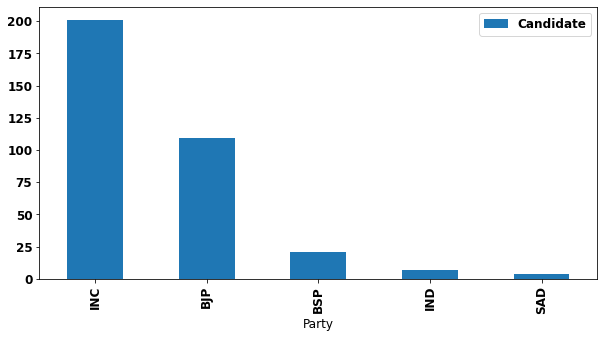

In [39]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

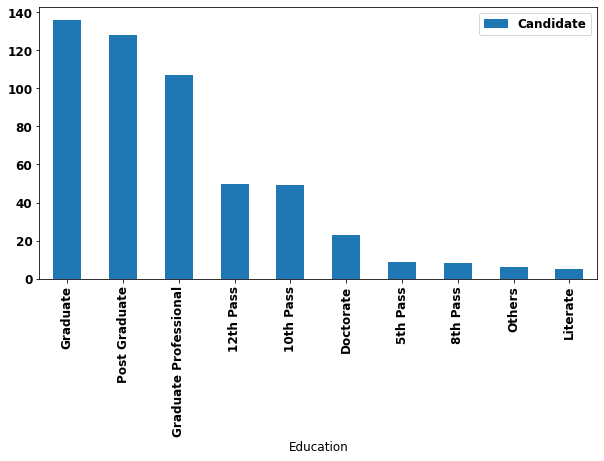

In [40]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [41]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                     
Party                       BJP  BSP   INC  IND  SAD
Education                                           
10th Pass                  16.0  3.0  11.0  0.0  2.0
12th Pass                  12.0  3.0  15.0  0.0  0.0
5th Pass                    4.0  0.0   3.0  0.0  0.0
8th Pass                    2.0  2.0   2.0  0.0  0.0
Doctorate                   4.0  1.0  13.0  0.0  0.0
Graduate                   29.0  5.0  55.0  4.0  0.0
Graduate Professional      23.0  2.0  45.0  3.0  1.0
Literate                    0.0  1.0   1.0  0.0  0.0
Others                      0.0  0.0   2.0  0.0  0.0
Post Graduate              19.0  4.0  54.0  0.0  1.0

In [42]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

Candidate  Constituency  Party  \
0                             KAMESHWAR BAITHA       Palamau    JMM   
1                       AHIR HANSARAJ GANGARAM    Chandrapur    BJP   
2             VITTHALBHAI HANSRAJBHAI RADADIYA     Porbandar    INC   
3                           CHANDRAKANT KHAIRE    Aurangabad    SHS   
4                                   M B Rajesh      Palakkad    CPM   
5                           N Chaluvarayaswamy        Mandya  JD(S)   
6   BHONSLE SHRIMANT CHH. UDYANRAJE PRATAPSINH        Satara    NCP   
7                           Tathagata Satpathy     Dhenkanal    BJD   
8                                P.Karunakaran     Kasaragod    CPM   
9                               RAMAKANT YADAV      Azamgarh    BJP   
10                             BAL KUMAR PATEL      Mirzapur     SP   
11                  JADHAV PRATAPRAO GANPATRAO      Buldhana    SHS   
12                                   RAMKISHUN     Chandauli     SP   
13                GANDHI DILIPKUMAR MANSUKHLAL    Ahmednagar    BJP   
14                    PATIL PADAMSINHA BAJIRAO     Osmanabad    NCP   
15                               RAKESH SACHAN      Fatehpur     SP   
16                      BABAR GAJANAN DHARMSHI         Maval    SHS   
17              Yashbanta Narayan Singh Laguri      Keonjhar    BJD   
18                 CHANDRAKANT RAGHUNATH PATIL       Navsari    BJP   
19                         FEROZE VARUN GANDHI      Pilibhit    BJP   
20                             DEVENDRA NAGPAL        Amroha    RLD   
21                       RAJKUMARI RATNA SINGH    Pratapgarh    INC   
22                              N. Dharamsingh         Bidar    INC   
23                                  TAPAS PAUL  Krishnanagar   AITC   
24                SANJAY BRIJKISHORLAL NIRUPAM  Mumbai North    INC   

                Education  Criminal Cases  
0               10th Pass              46  
1               10th Pass              30  
2                Graduate              16  
3               12th Pass              16  
4           Post Graduate              16  
5               12th Pass              15  
6                  Others              14  
7               12th Pass              13  
8           Post Graduate              12  
9               10th Pass              11  
10              12th Pass              10  
11               Graduate              10  
12  Graduate Professional              10  
13              10th Pass               9  
14  Graduate Professional               7  
15          Post Graduate               7  
16               Literate               7  
17               Graduate               6  
18              10th Pass               6  
19               Graduate               6  
20               Graduate               6  
21               Graduate               5  
22          Post Graduate               5  
23               Graduate               5  
24               Graduate               5

In [43]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

Candidate     Constituency Party  \
0                 Ponnam Prabhakar       Karimnagar   INC   
1                       RAMEN DEKA        Mangaldoi   BJP   
2               MEENAKSHI NATRAJAN         Mandsour   INC   
3              BASORI SINGH MASRAM           Mandla   INC   
4                  VIRBHADRA SINGH            Mandi   INC   
5                      Mausam Noor    Maldaha Uttar   INC   
6         Abu Hasem Khan Choudhury  Maldaha Dakshin   INC   
7                         E Ahamed       Malappuram   MUL   
8              MULAYAM SINGH YADAV         Mainpuri    SP   
9       JAYSHREEBEN KANUBHAI PATEL         Mahesana   BJP   
10  Chandulal Sahu (Chandu Bhaiya)       Mahasamund   BJP   
11           CHOUDHURY MOHAN JATUA       Mathurapur  AITC   
12                       P. BALRAM      Mahabubabad   INC   
13          HUKM DEO NARAYAN YADAV        Madhubani   BJP   
14   PAWAR SHARADCHANDRA GOVINDRAO            Madha   NCP   
15          Konakalla Narayana Rao    Machilipatnam   TDP   
16                    TUFANI SAROJ     Machhlishahr    SP   
17                   MANISH TEWARI         Ludhiana   INC   
18                   LAL JI TANDON          Lucknow   BJP   
19                Sudershan Bhagat        Lohardaga   BJP   
20                     DR. BALIRAM          Lalganj   BSP   
21   Muhammed Hamdulla Sayeed A.B.      Lakshadweep   INC   
22                     HASSAN KHAN           Ladakh   IND   
23                     ALAGIRI M.K          Madurai   DMK   
24                     Laxman Tudu       Mayurbhanj   BJD   

                Education  Criminal Cases  
0   Graduate Professional               0  
1                Graduate               0  
2           Post Graduate               0  
3                8th Pass               0  
4           Post Graduate               0  
5   Graduate Professional               0  
6               Doctorate               0  
7           Post Graduate               0  
8           Post Graduate               0  
9               10th Pass               0  
10  Graduate Professional               0  
11          Post Graduate               0  
12               Graduate               0  
13               Graduate               0  
14              10th Pass               0  
15              12th Pass               0  
16               Graduate               0  
17  Graduate Professional               0  
18               Graduate               0  
19               Graduate               0  
20              Doctorate               0  
21  Graduate Professional               0  
22               Graduate               0  
23               Graduate               0  
24               Graduate               0

<AxesSubplot:xlabel='Party'>

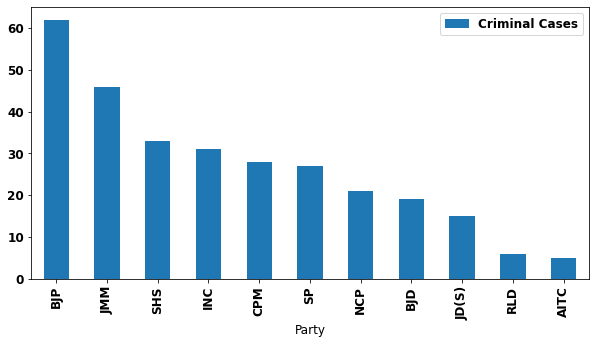

In [44]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [45]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

Candidate          Constituency  Party  Total Assets
0               Nama Nageswara Rao               Khammam    TDP    1737508117
1                    NAVEEN JINDAL           Kurukshetra    INC    1310730000
2                      L Rajagopal            Vijayawada    INC    1222964909
3                Dr. G. Vivekanand            Peddapalle    INC     729509675
4           Y.S. Jagan Mohan Reddy                Kadapa    INC     728151658
5            RAJKUMARI RATNA SINGH            Pratapgarh    INC     678270725
6                   HARSIMRAT KAUR              Bathinda    SAD     603100135
7                     SUPRIYA SULE              Baramati    NCP     515363663
8             SURENDRA SINGH NAGAR   Gautam Budhha Nagar    BSP     492084300
9                 H D KUMARA SWAMY       Bangalore Rural  JD(S)     491683477
10                    PRENEET KAUR               Patiala    INC     423043438
11                      ANNUTANDON                 Unnao    INC     421352753
12    UDAY SINGH ALIAS PAPPU SINGH                Purnia    BJP     419130669
13               M Rajamohan Reddy               Nellore    INC     363462696
14                DUTT PRIYA SUNIL  Mumbai North Central    INC     349576448
15  SHIVAKUMAR CHANNABASAPPA UDASI                Haveri    BJP     323361935
16                     KAPIL SIBAL         Chandni Chowk    INC     319722459
17                 BADRUDDIN AJMAL                Dhubri   AUDF     303520991
18                    Pinaki Misra                  Puri    BJD     296900000
19              PRAVEEN SINGH ARON              Bareilly    INC     288019293
20                     DATTA MEGHE                Wardha    INC     287739495
21               VIJAYA SHANTHI .M                 Medak    TRS     271066905
22                   CHIDAMBARAM P             Sivaganga    INC     267908542
23                  VINCENT H PALA              Shillong    INC     251618190
24                AARON RASHID.J.M                 Theni    INC     248974573

<AxesSubplot:xlabel='Party'>

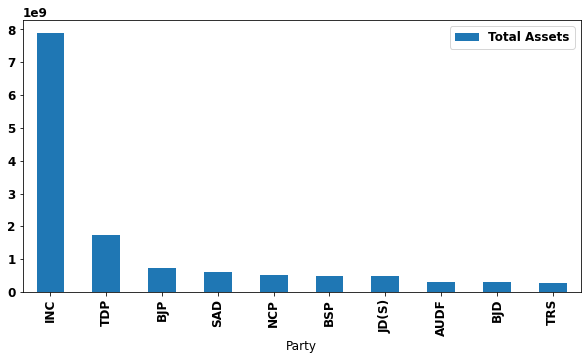

In [46]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 